In [1]:
# import necessary modules
import pandas as pd
import numpy as np
import mne
from datetime import datetime, date
from dateutil import parser
import matplotlib.pyplot as plt
import seaborn as sns
import os.path as op

In [2]:
docs_dir = '/Users/yeganeh/Codes/otka-preprocessing/docs'
eeg_dir = '/Users/yeganeh/Documents/Raw Files/PLB_HYP_OTKA/Live Sessions'

# open behavioral data
bhdata = pd.read_excel(f'{docs_dir}/data_with_hypnotizability.xlsx', header=1)
bhdata.set_index('index', inplace=True)
triggers = [c for c in bhdata.columns if 'timestamp' in c]
bh_time = bhdata[triggers]

# open ids map between eeg and behavioral data
ids_map = pd.read_excel(f'{docs_dir}/eeg_behavioral_bids_idsmap.xlsx', header=1)

In [9]:
ids_map_intact = ids_map
bh_id = ids_map_intact['behavioral_id']
eeg_id = ids_map_intact['eeg_id']
sub_ids_map = dict(zip(eeg_id, bh_id))

# 
for sub_id in [214611]:
    bh_time_sub = bh_time.loc[sub_ids_map[sub_id]]
    eeg = mne.io.read_raw_brainvision(f'{eeg_dir}/{sub_id}.vhdr')
    desc = eeg.annotations.description

    # EEG trigger  
    onset = eeg.annotations.onset
    if list(desc).count('Stimulus/S  1') == 1:
        eeg_trg1 = onset[desc == f'Stimulus/S  1']
    elif list(desc).count('Stimulus/S  1') > 1:
        eeg_trg1 = onset[list(desc).index('Stimulus/S  1')]
    else:
        continue
    
    eeg_trg = eeg.annotations.onset[-18:] - eeg_trg1

    # behavioral timestamps
    bh_trg1 = parser.parse(bh_time_sub['timestamp_trigger_1'])
    bhtrgs = []
    for rec in range(1,5):
        for trg in range(4,8):
            bh_trg = parser.parse(bh_time_sub[f'timestamp_trigger_{trg}_recording_{rec}']) - bh_trg1
            bhtrgs.append(bh_trg)
    # add posthyp baseline timstamps
    for name in ['recording_posthyp','recording_posthyp_end']:
        bh_trg = parser.parse(bh_time_sub[f'timestamp_{name}']) - bh_trg1
        bhtrgs.append(bh_trg)
        

    # the difference between behavioral and eeg triggers
    bhtrg_toseconds = [bhtrgs[i].total_seconds() for i in range(len(bhtrgs))]
    diff = abs(eeg_trg - bhtrg_toseconds)

Extracting parameters from /Users/yeganeh/Documents/Raw Files/PLB_HYP_OTKA/Live Sessions/214611.vhdr...
Setting channel info structure...


/var/folders/pn/qy0qc5tx7t7_97xjmy6pvksc0000gn/T/ipykernel_48476/4153337822.py:9: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(f'{eeg_dir}/{sub_id}.vhdr')


In [ ]:
def parsers(row):
    row.timestamp_trigger_4_recording_1 = row.timestamp_trigger_4_recording_1.total_seconds()
    return row
timestamps_tri.apply(parsers, axis='columns')
# [parser.parse(timestamps_tri.iloc[0,i]) for i in range(len(timestamps_tri.iloc[0]))]

In [196]:
diff_di = {}
for sub_id in timestamps.index:
    bh_trg1 = parser.parse(timestamps.loc[sub_id,'timestamp_trigger_1'])
    bhtrgs = []
    for rec in range(1,5):
        for trg in range(4,8):
            bh_trg = parser.parse(timestamps.loc[sub_id,f'timestamp_trigger_{trg}_recording_{rec}']) - bh_trg1
            bhtrgs.append(bh_trg.total_seconds())
    # times = np.array([parser.parse(timestamps.loc[sub_id,i]) for i in timestamps.columns])
    # diff = times - times[0]
    # diff_toseconds = [bhtrgs[i].total_seconds() for i in range(len(diff))]
    diff = np.diff(bhtrgs)
    diff_di[sub_id] = diff


In [199]:
df = pd.DataFrame.from_dict(diff_di)
df

,2122611,2122614,213211,213214,213411,213414,213511,213514,213911,2131111,...,2152714,2152811,2152814,216111,2106114,2160311,21060314,2160811,216814,2161011
0,154.0,154.0,154.0,154.0,155.0,154.0,155.0,154.0,155.0,103.0,...,108.0,137.0,103.0,108.0,137.0,103.0,103.0,109.0,108.0,108.0
1,336.0,338.0,331.0,331.0,363.0,331.0,335.0,363.0,335.0,337.0,...,336.0,344.0,337.0,331.0,392.0,336.0,363.0,363.0,337.0,331.0
2,416.0,416.0,417.0,417.0,416.0,417.0,417.0,417.0,417.0,417.0,...,416.0,419.0,417.0,417.0,419.0,416.0,416.0,418.0,417.0,416.0
3,351.0,240.0,159.0,122.0,142.0,132.0,215.0,253.0,115.0,182.0,...,148.0,272.0,394.0,171.0,192.0,127.0,314.0,161.0,355.0,623.0
4,155.0,154.0,155.0,154.0,154.0,155.0,155.0,155.0,155.0,108.0,...,103.0,111.0,103.0,108.0,111.0,108.0,108.0,108.0,103.0,103.0
5,363.0,336.0,335.0,338.0,331.0,336.0,337.0,337.0,337.0,331.0,...,363.0,393.0,363.0,336.0,387.0,363.0,331.0,335.0,335.0,336.0
6,416.0,416.0,417.0,416.0,417.0,416.0,416.0,416.0,417.0,416.0,...,416.0,419.0,417.0,416.0,419.0,417.0,416.0,417.0,417.0,416.0
7,404.0,448.0,313.0,155.0,108.0,74.0,232.0,232.0,606.0,216.0,...,175.0,272.0,144.0,148.0,124.0,131.0,366.0,117.0,236.0,411.0
8,155.0,155.0,154.0,155.0,154.0,155.0,154.0,155.0,155.0,103.0,...,109.0,111.0,108.0,103.0,111.0,102.0,109.0,103.0,109.0,102.0
9,331.0,363.0,338.0,336.0,336.0,337.0,364.0,336.0,331.0,363.0,...,330.0,341.0,331.0,337.0,343.0,331.0,335.0,331.0,331.0,364.0


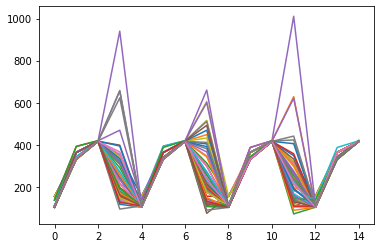

In [198]:
[plt.plot(df[i]) for i in df.columns]
plt.legend = df.columns
plt.show()

In [137]:
triggers = [c for c in bhdata.columns if 'timestamp_trigger' in c]
# triggers.remove('timestamp_trigger_1')
timestamps = bhdata[triggers]
timestamps.dropna(inplace=True)

/Users/yeganeh/miniconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
# this cell compare the EEG tiggers' timing with the timestamps in behavioral dataframe
## id map between EEG and behavioral ids
ids_map_intact = ids_map[:46]
ids_map_intact.set_index('eeg_id', inplace=True)
[ids_map_intact.drop(i, axis=0, inplace=True) for i in [214114,21042214,215711,214211]]
bh_id = ids_map_intact['behavioral_id']
eeg_id = ids_map_intact.index
sub_ids_map = dict(zip(eeg_id, bh_id))

# initiate a dictionary for collecting the precision in each data
diff_dict = {}

without_trg1 = []
# 
for sub_id in sub_ids_map:
    bh_time_sub = bh_time.loc[sub_ids_map[sub_id]]
    eeg = mne.io.read_raw_brainvision(f'{eeg_dir}/{sub_id}.vhdr')
    desc = eeg.annotations.description

    # EEG trigger  
    onset = eeg.annotations.onset
    if list(desc).count('Stimulus/S  1') == 1:
        eeg_trg1 = onset[desc == f'Stimulus/S  1']
    elif list(desc).count('Stimulus/S  1') > 1:
        eeg_trg1 = onset[list(desc).index('Stimulus/S  1')]
    else:
        without_trg1.append(sub_id)
        continue
    eeg_trg = eeg.annotations.onset[-18:] - eeg_trg1

    # behavioral timestamps
    bh_trg1 = parser.parse(bh_time_sub['timestamp_trigger_1'])
    bhtrgs = []
    for rec in range(1,5):
        for trg in range(4,8):
            bh_trg = parser.parse(bh_time_sub[f'timestamp_trigger_{trg}_recording_{rec}']) - bh_trg1
            bhtrgs.append(bh_trg)
    # add posthyp baseline timstamps
    for name in ['recording_posthyp','recording_posthyp_end']:
        bh_trg = parser.parse(bh_time_sub[f'timestamp_{name}']) - bh_trg1
        bhtrgs.append(bh_trg)

    # the difference between behavioral and eeg triggers
    bhtrg_toseconds = [bhtrgs[i].total_seconds() for i in range(len(bhtrgs))]
    diff = abs(eeg_trg - bhtrg_toseconds)
    diff_dict[sub_id] = diff


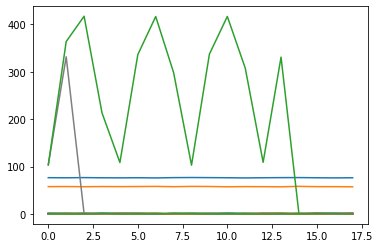

<Figure size 2880x2160 with 0 Axes>

In [20]:
# plot and inspect!
x = diff_dict.keys()

for i in diff_dict.keys():
    plt.plot(diff_dict[i])
# plt.legend(x)
plt.figure(figsize=(40, 30))
plt.show()
# [214114,21042214,215711,214211]

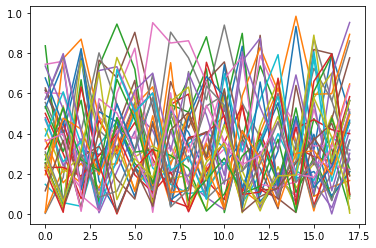

<Figure size 2880x2160 with 0 Axes>

In [33]:
# plot and inspect!
x = diff_dict.keys()

for i in diff_dict.keys():
    plt.plot(diff_dict[i])
# plt.legend(x)
plt.figure(figsize=(40, 30))
plt.show()

In [ ]:
# map between eeg and bids ids
ids_map_intact = ids_map[40:46] #data with impaired first baseline annotations
bh_id = ids_map_intact['behavioral_id']
eeg_id = ids_map_intact['eeg_id']
sub_ids_map = dict(zip(eeg_id, bh_id))
diff = {}

for sub_id in sub_ids_map:
    bh_time_sub = bh_time.loc[sub_ids_map[sub_id]]
    eeg = mne.io.read_raw_brainvision(f'{eeg_dir}/{sub_id}.vhdr')
    desc = eeg.annotations.description
    onset = eeg.annotations.onset
    index = list(desc).index('Stimulus/S  1')
    eeg_baseline = onset[-19] - onset[index]
    bh_trg1 = parser.parse(bh_time_sub['timestamp_trigger_1'])
    bh_baseline = parser.parse(bh_time_sub['timestamp_baseline_start']) - bh_trg1
    bh_baseline = bh_baseline.total_seconds()
    diff[sub_id] = eeg_baseline - bh_baseline


In [16]:
diff

{2151211: 332.831,
 21051811: 333.12299999999993,
 2152714: 333.50199999999995,
 21052511: 332.996,
 2160311: 333.44500000000005,
 2160314: 333.36799999999994}

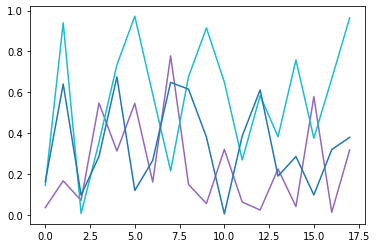

<Figure size 2880x2160 with 0 Axes>

In [164]:
# plot and inspect!
x = diff_dict.keys()

for i in diff_dict.keys():
    plt.plot(diff_dict[i])
# plt.legend(x)
plt.figure(figsize=(40, 30))
plt.show()

In [ ]:
# [214114,21042214,215711,214211]
# eeg_trg = np.delete(eeg.annotations.onset, -5)
# eeg_trg = eeg_trg[-18:] - eeg_trg1